In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 29 09:11:31 2018

@author: mrclnndrd
"""
%matplotlib notebook 
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [ ]:

N=12#Número de Alunos
result = []
while len(result) != N:
    r = np.random.randint(1, N+1)
    if r not in result:
        result.append(r)
print("Ordem de Apresentação: "+str(result))

<IPython.core.display.Javascript object>


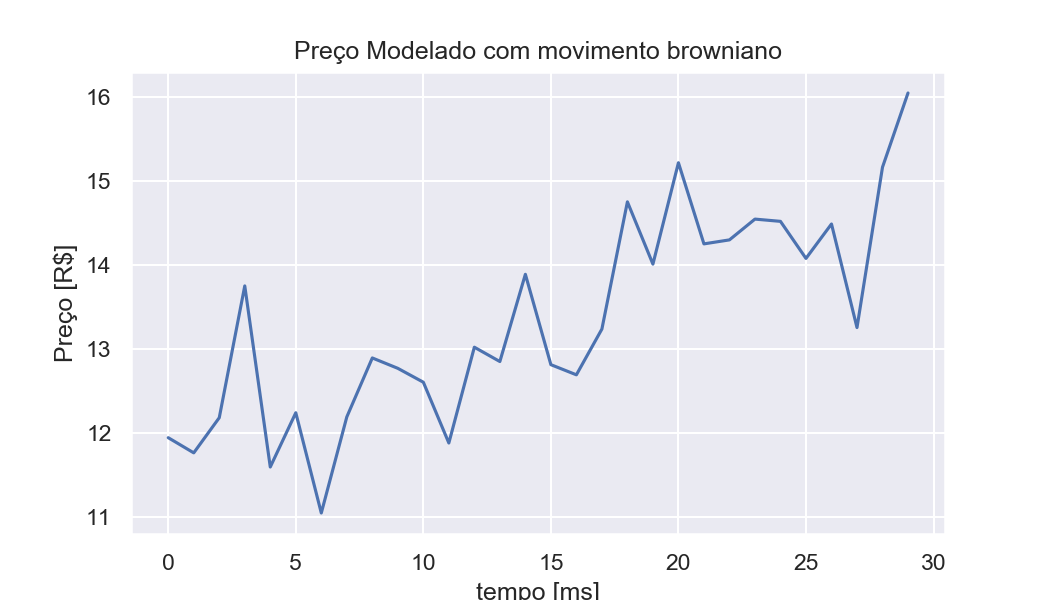

Text(0.5, 1.0, 'Preço Modelado com movimento browniano')

In [2]:
po=12

mu=.1
sigma=.8
w = np.random.normal(0,1, 30)
t=np.arange(0,30)


p1=po+mu*t+sigma*w

fig = plt.subplots(figsize=(7, 4))
plt.plot(p1)
plt.ylabel('Preço [R$]')
plt.xlabel('tempo [ms]')
plt.title('Preço Modelado com movimento browniano')


<IPython.core.display.Javascript object>


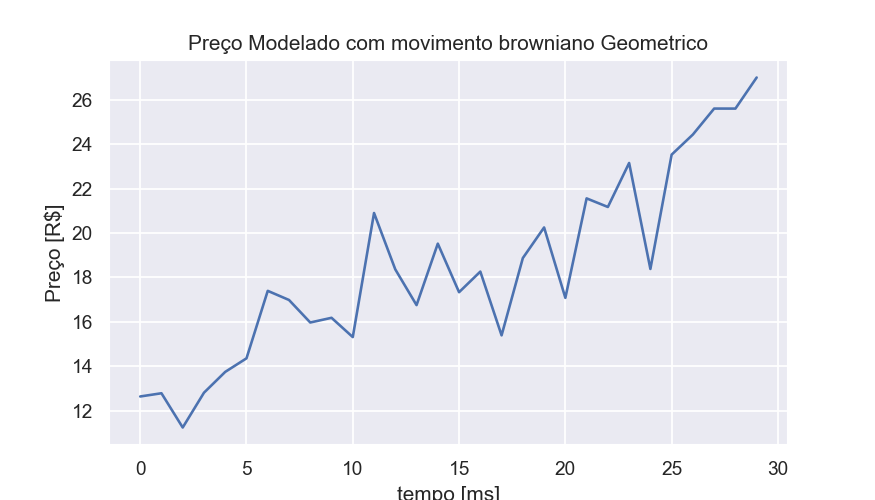

Text(0.5, 1.0, 'Preço Modelado com movimento browniano Geometrico')

In [3]:
po=12
mu=.03
sigma=.1
w = np.random.normal(0,1, 30)
t=np.arange(0,30)
p2=po*np.exp((mu-(sigma**2)/2)*t+sigma*w)

fig = plt.subplots(figsize=(7, 4))
plt.plot(p2)
plt.ylabel('Preço [R$]')
plt.xlabel('tempo [ms]')
plt.title('Preço Modelado com movimento browniano Geometrico')


<IPython.core.display.Javascript object>


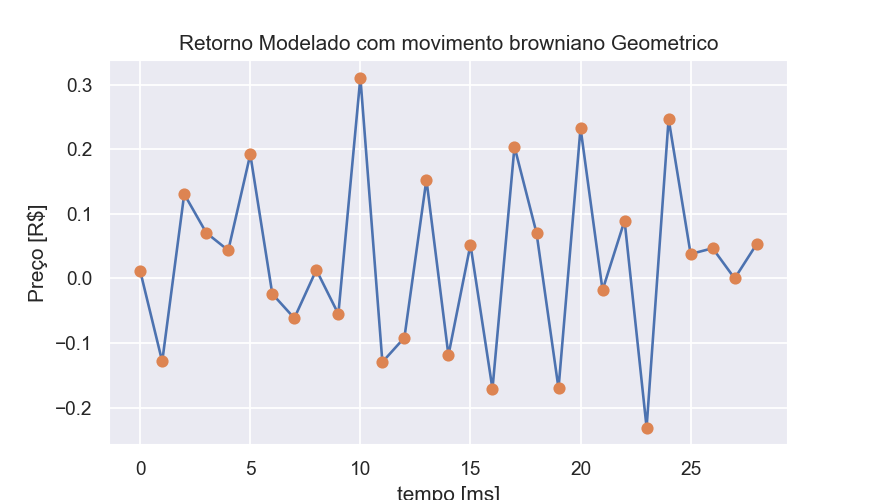

Text(0.5, 1.0, 'Retorno Modelado com movimento browniano Geometrico')

In [6]:
s2=np.log(p2[1:])-np.log(p2[0:-1])

fig = plt.subplots(figsize=(7, 4))
plt.plot(s2)
plt.plot(s2,'o')
plt.ylabel('Preço [R$]')
plt.xlabel('tempo [ms]')
plt.title('Retorno Modelado com movimento browniano Geometrico')


<IPython.core.display.Javascript object>


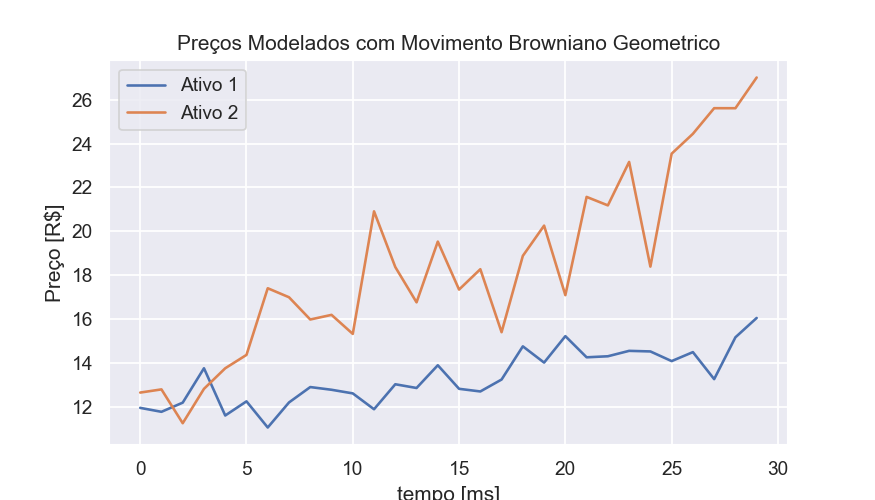

Text(0.5, 1.0, 'Preços Modelados com Movimento Browniano Geometrico')

In [7]:
df=pd.DataFrame(p1)
df.columns=['p1']
df['p2']=p2

fig = plt.subplots(figsize=(7, 4))
plt.plot(df['p1'],label='Ativo 1')
plt.plot(df['p2'],label='Ativo 2')

plt.legend(loc='upper left')
plt.ylabel('Preço [R$]')
plt.xlabel('tempo [ms]')
plt.title('Preços Modelados com Movimento Browniano Geometrico')


In [ ]:
df.head()

<IPython.core.display.Javascript object>


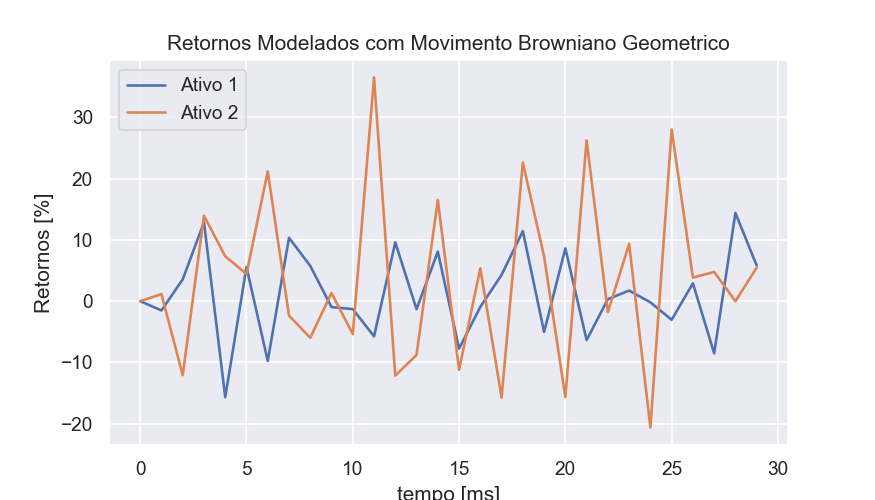

Text(0.5, 1.0, 'Retornos Modelados com Movimento Browniano Geometrico')

In [8]:
r1=df['p1'][1:].values/df['p1'][0:-1].values-1
df['r1']=np.concatenate(([0], r1), axis=0)
r2=df['p2'][1:].values/df['p2'][0:-1].values-1
df['r2']=np.concatenate(([0], r2), axis=0)
#fig = plt.subplots()
#df[['r1','r2']].plot()
#df

fig = plt.subplots(figsize=(7, 4))
plt.plot(100*df['r1'],label='Ativo 1')  
plt.plot(100*df['r2'],label='Ativo 2') 
plt.legend(loc='upper left')
plt.legend(loc='upper left')
plt.ylabel('Retornos [%]')
plt.xlabel('tempo [ms]')
plt.title('Retornos Modelados com Movimento Browniano Geometrico')


<IPython.core.display.Javascript object>


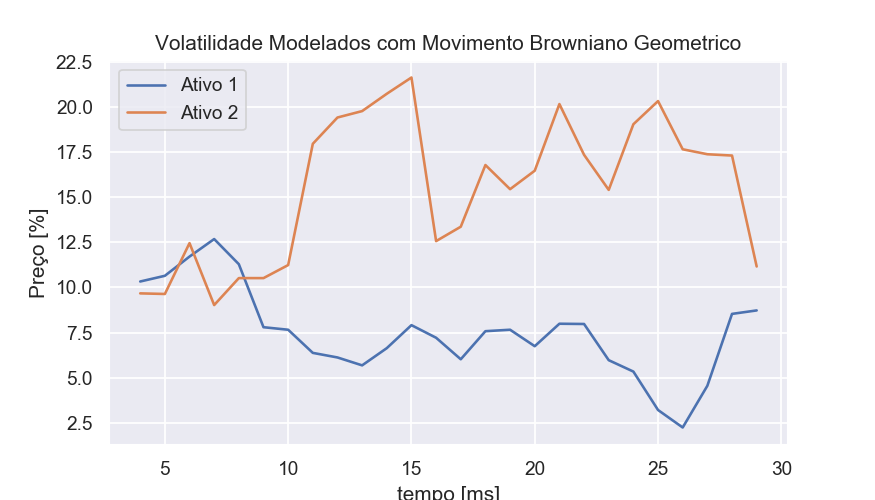

Text(0.5, 1.0, 'Volatilidade Modelados com Movimento Browniano Geometrico')

In [9]:
r1=df['p1'][1:].values/df['p1'][0:-1].values-1
df['r1']=100*np.concatenate(([0], r1), axis=0)
r2=df['p2'][1:].values/df['p2'][0:-1].values-1
df['r2']=100*np.concatenate(([0], r2), axis=0)
#fig = plt.subplots()
#df[['r1','r2']].plot()
#df

fig = plt.subplots(figsize=(7, 4))
plt.plot(df['r1'].rolling(window=5).std(),label='Ativo 1')  
plt.plot(df['r2'].rolling(window=5).std(),label='Ativo 2') 
plt.legend(loc='upper left')
plt.legend(loc='upper left')
plt.ylabel('Preço [%]')
plt.xlabel('tempo [ms]')
plt.title('Volatilidade Modelados com Movimento Browniano Geometrico')


<IPython.core.display.Javascript object>


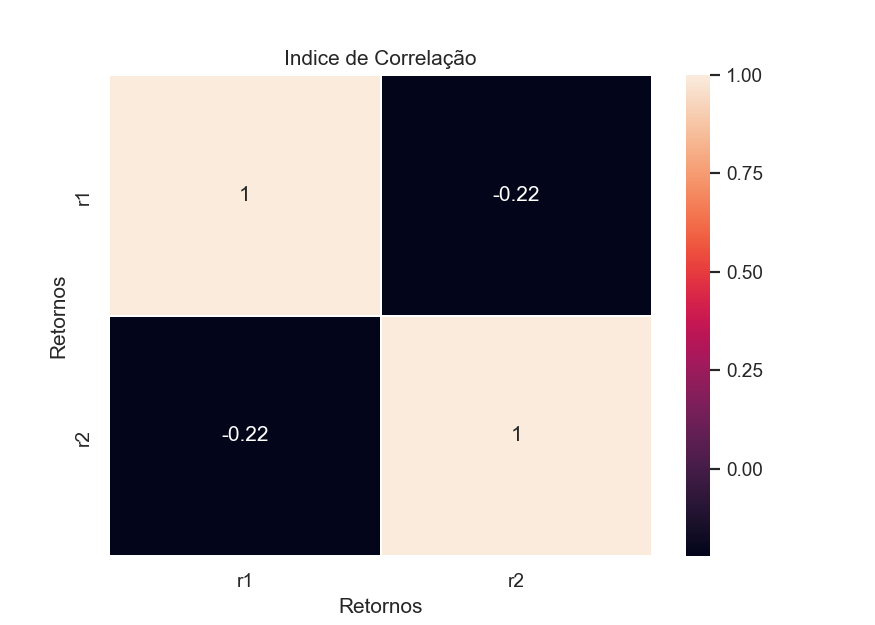

Text(0.5, 1.0, 'Indice de Correlação')

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(7,5))
sns.heatmap(df[['r1','r2']].corr(), annot=True, linewidths=.5, ax=ax)
ax.set_ylabel("Retornos")
ax.set_xlabel("Retornos")
ax.set_title("Indice de Correlação")

<IPython.core.display.Javascript object>


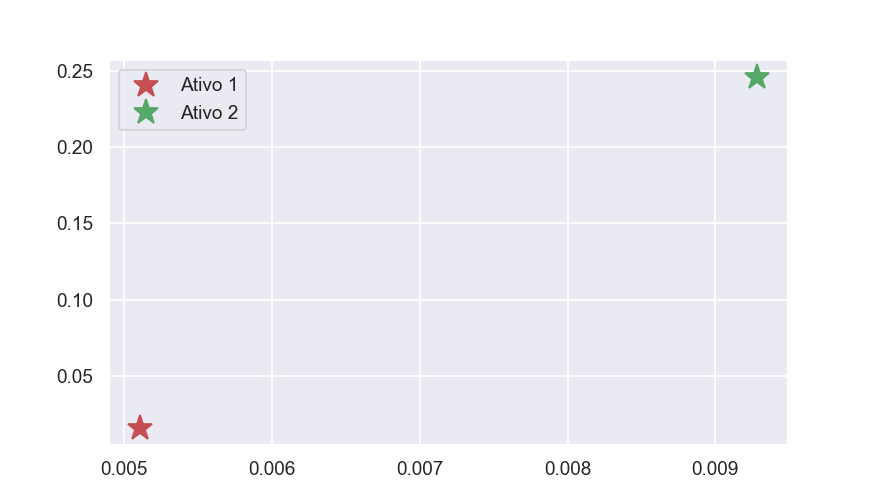

/home/mrclnndrd/anaconda3/lib/python3.5/site-packages/matplotlib/legend.py:493: UserWarning: Unrecognized location "center top". Falling back on "best"; valid locations are
	upper left
	upper center
	center
	lower left
	right
	center right
	lower right
	lower center
	upper right
	center left
	best

  % (loc, '\n\t'.join(self.codes)))


In [11]:
po=12

mu=.006
sigma=.05
w = np.random.normal(0,1, 30)
t=np.arange(0,30)
p1=po+mu*t+sigma*w



po=12
mu=.008
sigma=.008
w = np.random.normal(0,1, 30)
t=np.arange(0,30)
p2=po*np.exp((mu-(sigma**2)/2)*t+sigma*w)

df=pd.DataFrame(p1)
df.columns=['p1']
df['p2']=p2

r1=df['p1'][1:].values/df['p1'][0:-1].values-1
df['r1']=np.concatenate(([0], r1), axis=0)
r2=df['p2'][1:].values/df['p2'][0:-1].values-1
df['r2']=np.concatenate(([0], r2), axis=0)

risk1=df['r1'].std()
return1=df['r1'].sum()
risk2=df['r2'].std()
return2=df['r2'].sum()

fig = plt.subplots(figsize=(7, 4))
plt.plot(risk1, return1, 'r*', markersize=15.0,label='Ativo 1')  
plt.plot(risk2, return2, 'g*', markersize=15.0,label='Ativo 2') 
plt.legend(loc='center top')
#plt.axis([0,20,0,10])

In [ ]:
df.std()

In [ ]:
sharpe1=(df['r1'].sum()-5/(12*100))/df['r1'].std()
sharpe2=(df['r2'].sum()-5/(12*100))/df['r2'].std()
[sharpe1,sharpe2]

In [ ]:
cor1=(np.mean(df['r1']*df['r2'])-np.mean(df['r1'])*np.mean(df['r2']))/(np.std(df['r1'])*np.std(df['r2']))
cor2=df[['r1','r2']].corr()
[cor1 ,cor2['r1'][1]]


In [ ]:
DF=pd.DataFrame([12.4, 12.8, 12.3, 12.1, 12.5])
DF.columns=['p1']
DF['p2']=[45.3, 45.9, 45.1, 44.7, 45.2]
r1=DF['p1'][1:].values/DF['p1'][0:-1].values-1
DF['r1']=np.concatenate(([0], r1), axis=0)
r2=DF['p2'][1:].values/DF['p2'][0:-1].values-1
DF['r2']=np.concatenate(([0], r2), axis=0)

In [ ]:
mu=DF[['r1','r2']][1:].mean().values
sigma=DF[['r1','r2']][1:].std().values
I = np.identity(2)
ss=sigma*I
np.corrcoef(DF['r1'].values,DF['r2'].values)


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 29 09:11:31 2018

@author: mrclnndrd
"""
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
sns.set()


STOCKS=['arquivo/USIM5_H1_201601041000_201801291700.csv','arquivo/GGBR4_H1_201601041000_201801291700.csv',
        'arquivo/PETR3_H1_201601041000_201801291700.csv','arquivo/MGLU3_H1_201601041000_201801291700.csv',
        'arquivo/BBAS3_H1_201601041000_201801291700.csv','arquivo/NATU3_H1_201601041000_201801291700.csv',
        'arquivo/PETR4_H1_201601041000_201801291700.csv','arquivo/FIBR3_H1_201601041000_201801291700.csv',
        'arquivo/BVMF3_H1_201601041000_201801291700.csv','arquivo/VALE3_H1_201601041000_201801291700.csv']


Name=[]
for p in range(0,  len(STOCKS)):
    df = read_csv(STOCKS[p], header=None)
    DATE=[]
    TIME=[]
    OPEN=[]
    HIGH=[]
    LOW=[]
    CLOSE=[]
    TVOL=[]
    RVOL=[]
    S=[]
    for k in range(1,  len(df)):
        Date,Time,Open,High,Low,Close,TVol,RVol,s =df.iloc[k][0].split("\t")
        DATE.append(datetime.strptime(Date+" "+Time,"%Y.%m.%d %H:%M:%S"))
        OPEN.append(float(Open))
        HIGH.append(float(High))    
        LOW.append(float(Low))
        CLOSE.append(float(Close))  
        TVOL.append(int(TVol))
        RVOL.append(int(RVol))
        S.append(s)
    stock=pd.DataFrame([DATE,OPEN,HIGH,LOW,CLOSE,TVOL,RVOL]).transpose()    
    stock.columns = ['DATE','OPEN','HIGH','LOW','CLOSE','TVOL','RVOL']
    stock.set_index('DATE', inplace=True)
    if p==0:
        result = stock['CLOSE'].astype(float) #pd.concat([stock['CLOSE'], stock['CLOSE']], axis=1, join_axes=[stock.index])    
        Name.append(STOCKS[p][8:13])  
    if p==1:
        stock_old=stock
        result = pd.concat([result[:], stock_old['CLOSE'].astype(float)], axis=1, join_axes=[stock.index])            
        Name.append(STOCKS[p][8:13])       
    if p>1:
        stock_old=stock
        result = pd.concat([result[:], stock_old['CLOSE'].astype(float)], axis=1, join_axes=[stock.index])    
        Name.append(STOCKS[p][8:13]) 
result.columns=Name
corre=result.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corre, annot=True, linewidths=.5, ax=ax)

In [ ]:
display(result.head())

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 29 09:11:31 2018

@author: mrclnndrd
"""
%matplotlib notebook 
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

STOCKS=['arquivo/WDO@N_M5_201601040900_201803221755.csv','arquivo/WIN@N_M5_201601040900_201803231800.csv',
        'arquivo/WDO@N_M15_201601040900_201803211745.csv','arquivo/WIN@N_M15_201601040900_201803221630.csv',        
        'arquivo/WDO@N_M30_201601040900_201803221730.csv','arquivo/WIN@N_M30_201601040900_201803231800.csv']



Name=[]
for p in range(0,  len(STOCKS)):
    df = read_csv(STOCKS[p], header=None)
    DATE=[]
    TIME=[]
    OPEN=[]
    HIGH=[]
    LOW=[]
    CLOSE=[]
    TVOL=[]
    RVOL=[]
    S=[]
    for k in range(1,  len(df)):
        Date,Time,Open,High,Low,Close,TVol,RVol,s =df.iloc[k][0].split("\t")
        DATE.append(datetime.strptime(Date+" "+Time,"%Y.%m.%d %H:%M:%S"))
        OPEN.append(float(Open))
        HIGH.append(float(High))    
        LOW.append(float(Low))
        CLOSE.append(float(Close))  
        TVOL.append(int(TVol))
        RVOL.append(int(RVol))
        S.append(s)
    stock=pd.DataFrame([DATE,OPEN,HIGH,LOW,CLOSE,TVOL,RVOL]).transpose()    
    stock.columns = ['DATE','OPEN','HIGH','LOW','CLOSE','TVOL','RVOL']
    stock.set_index('DATE', inplace=True)
    if p==0:
        result = stock['CLOSE'].astype(float) #pd.concat([stock['CLOSE'], stock['CLOSE']], axis=1, join_axes=[stock.index])    
        Name.append(STOCKS[p][8:17])  
    if p==1:
        stock_old=stock
        result = pd.concat([result[:], stock_old['CLOSE'].astype(float)], axis=1, join_axes=[stock.index])            
        Name.append(STOCKS[p][8:17])       
    if p>1:
        stock_old=stock
        result = pd.concat([result[:], stock_old['CLOSE'].astype(float)], axis=1, join_axes=[stock.index])    
        Name.append(STOCKS[p][8:17]) 
result.columns=Name
corre=result.corr()
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corre, annot=True, linewidths=.5, ax=ax)

In [ ]:
import numpy as np
_sum = 10
n = 5
for k in range(10000):
    rnd_array = np.random.multinomial(_sum, np.ones(n)/n, size=1)[0]
    print(rnd_array,np.sum(rnd_array))
